# Imports:

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Sequence

# Classes:

In [53]:
class twoDimRandomWalk:
    """
    the class to simulate two dim random Walk

    the walker randomly goes right with possibility 00.25 ,left with possibility 0.25 ,up with possibility 0.25 and down with possibility 0.25
    r is the array containing random numbers representing walker's path in gauge 4
    walks is the array containing random numbers representing walker's path
    rs is the list of walkers positions

    methods:

    getX:
        the function to get the distance of the walker with (0,0) at the time t by calculating the norm of the sum of the steps' array until time t witch is a complex number

    run:
        the function to run the main process of simulation during a main loop and appending x,meanX and var(x) to the data lists
    """
    def __init__(self, steps: int) -> None:
        """
        the function to construct RandomWalk object

        :param steps: the total steps the walker goes
        :type steps: int
        """
        self.steps = steps
        r = np.floor(np.random.uniform(0,4,self.steps))
        self.walks = np.ones(self.steps) * (r==0) * 1 + np.ones(self.steps)*(r==3)*-1j + np.ones(self.steps)*(r==2)*1j + np.ones(self.steps) * (r==1) * -1
        self.rs = []
        self.r2s= []

    def getR(self, t: int) -> np.ndarray:
        """
        the function to get the distance of the walker with (0,0) at the time t by calculating the norm of the sum of the steps' array until time t witch is a complex number

        :param t: the input time we need to determine the position at
        :type t: int
        :return: the position of the walker
        :rtype: int
        """
        return np.linalg.norm(np.sum(self.walks[:t+1]))

    def run(self) -> None:
        """
        the function to run the main process of simulation during a main loop and appending x,meanX and var(x) to the data lists
        """
        for t in range(self.steps):
            self.rs.append(self.getR(t))


#### Iterating:

In [56]:
def getTwoDimResults(steps: int, iterations: int) -> Sequence:
    """
    the function to iterate and repeat getting results in a for loop and returning the mean of the results

    R2s is the list of squares of  rs for different iterations

    :param steps: the total steps the walker goes
    :type steps: int
    :param iterations: the number of iterations
    :type iterations: int
    :return: the sequence of mean of rs and mean of meanRs
    :rtype: Sequence
    """

    R2s = []
    for i in range(iterations):
        rw = twoDimRandomWalk(steps)
        rw.run()
        R2s.append(np.array(rw.rs)**2)
    return np.mean(R2s,axis=0)

#### Main Part:

In [62]:
mr2s= getTwoDimResults(100,1000)

In [63]:
print("r2 for steps and meanR2: ",np.corrcoef(np.arange(100),mr2s)[0][1])
print("slope: ",np.polyfit(np.arange(100),mr2s,1)[0])

r2 for steps and meanR2:  0.9996413504965396
slope:  0.9869778937893792


#### Plotting

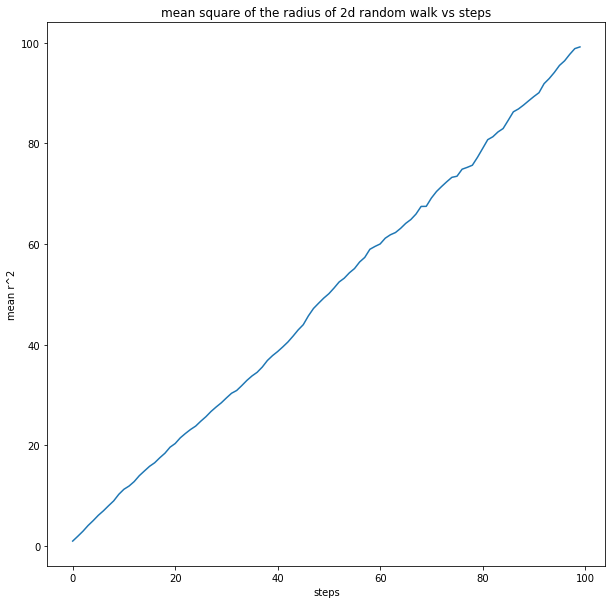

In [66]:
plt.figure(figsize=(10,10))
plt.title("mean square of the radius of 2d random walk vs steps")
plt.ylabel("mean r^2")
plt.xlabel("steps")
plt.plot(np.arange(100),mr2s)
plt.show()